# KB DATA 데이터

## 구독경제

In [131]:
subscribe_df = pd.read_excel("데이터거래소_구독경제.xlsx")

In [8]:
subscribe_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   반기기준     120 non-null    object
 1   대분류      120 non-null    object
 2   성별       120 non-null    object
 3   연령대_10세  120 non-null    object
 4   매출건수     120 non-null    int64 
 5   매출금액     120 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.8+ KB


In [9]:
subscribe_df.대분류.unique()

array(['기타', '가꾸기 관련', '먹고 마시는 것', '지식 관련', '취향 관련'], dtype=object)

In [53]:
eat_sum

,반기기준,매출건수,매출금액
0,19년 상반기,20282,1337773909
1,19년 하반기,17029,970881334
2,20년 상반기,30824,1797709420


- 분석 기간 : 2019 상반기~2020 상반기, 반기단위 집계
- 업종
    - 식음료(도시락, 커피, 주류, 반찬,간식)
    - 가꾸기(면도날, 화장품, 잡화, 여성용품, 칫솔 등)
    - 지식(도서, 뉴스/정보컨텐츠)
    - 취향관련(꽃, 그림)
    - 기타(유아용품, 영양제)

In [66]:
# 업종별 그래프 그려주는 함수 생성
def category_graph(category=None):
    
    category_df = subscribe_df[subscribe_df["대분류"] == category]
    sum_df = category_df.groupby(by="반기기준").sum()
    sum_df.reset_index(drop=False, inplace=True)
    change_transaction_rate = round((sum_df.loc[2,"매출건수"] - sum_df.loc[1,"매출건수"])/sum_df.loc[2,"매출건수"]*100,2)
    change_amount_rate = round((sum_df.loc[2,"매출금액"] - sum_df.loc[1,"매출금액"])/sum_df.loc[2,"매출금액"]*100,2)
    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    a = sns.barplot(x="반기기준",y="매출건수", data=sum_df, ax=ax[0],)
    b = sns.barplot(x="반기기준",y="매출금액", data=sum_df, ax=ax[1])
    
    ax[0].set_title("반기 기준 {} 매출 건수 변화".format(category))
    ax[0].set_xlabel("2019 하반기 대비 매출 건수 {}% 상승".format(change_transaction_rate))
    ax[1].set_title("반기 기준 {} 매출 금액변화".format(category))
    ax[1].set_xlabel("2019 하반기 대비 매출 금액 {}% 상승".format(change_amount_rate))
    

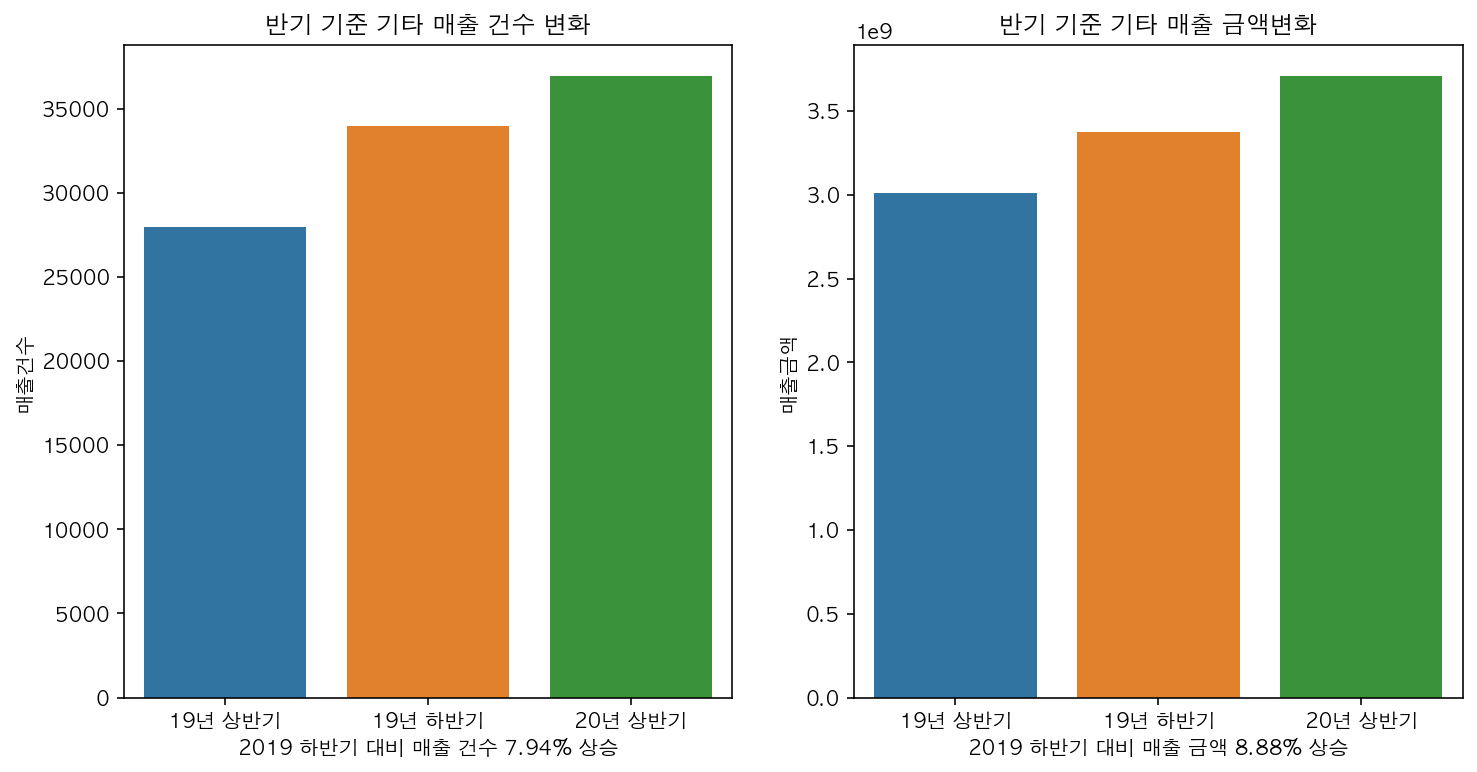

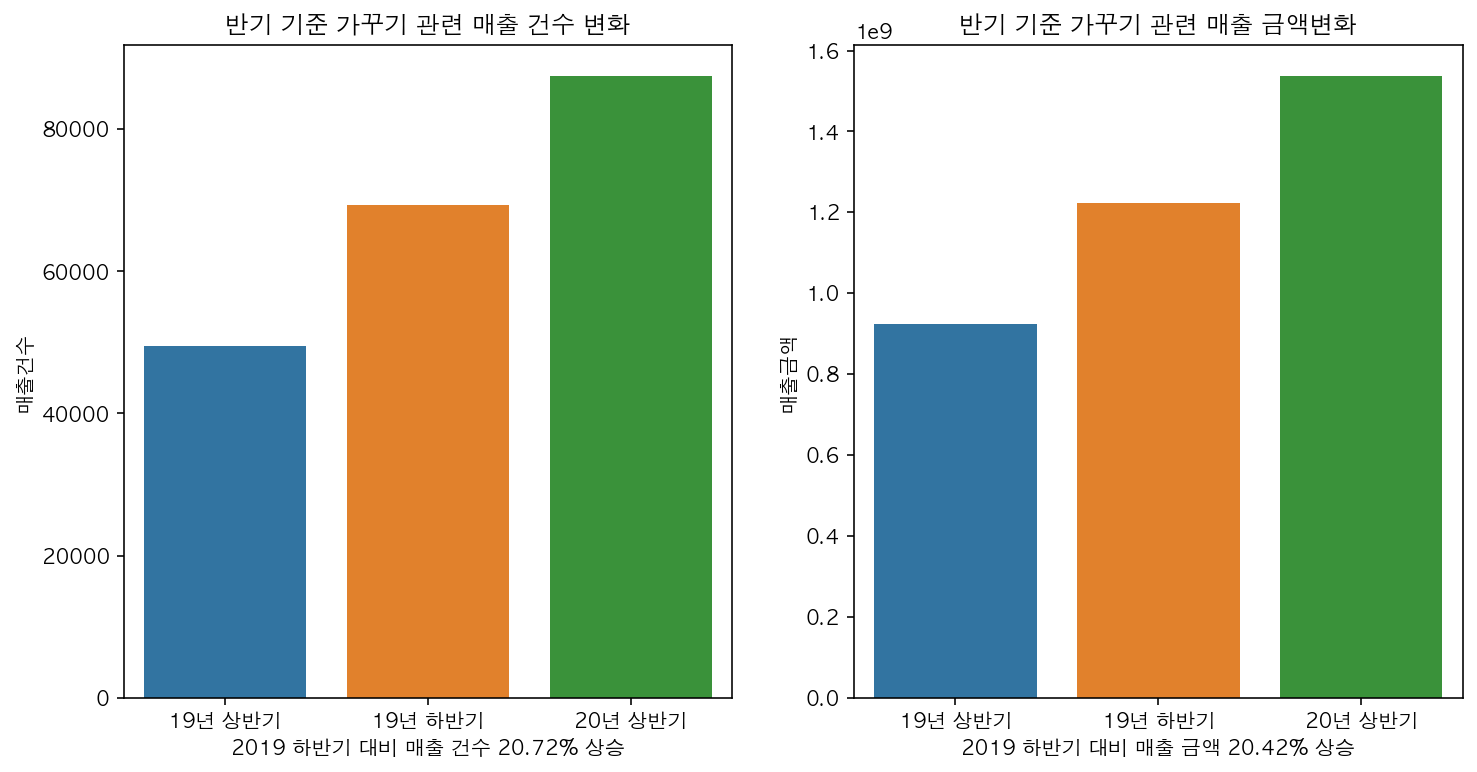

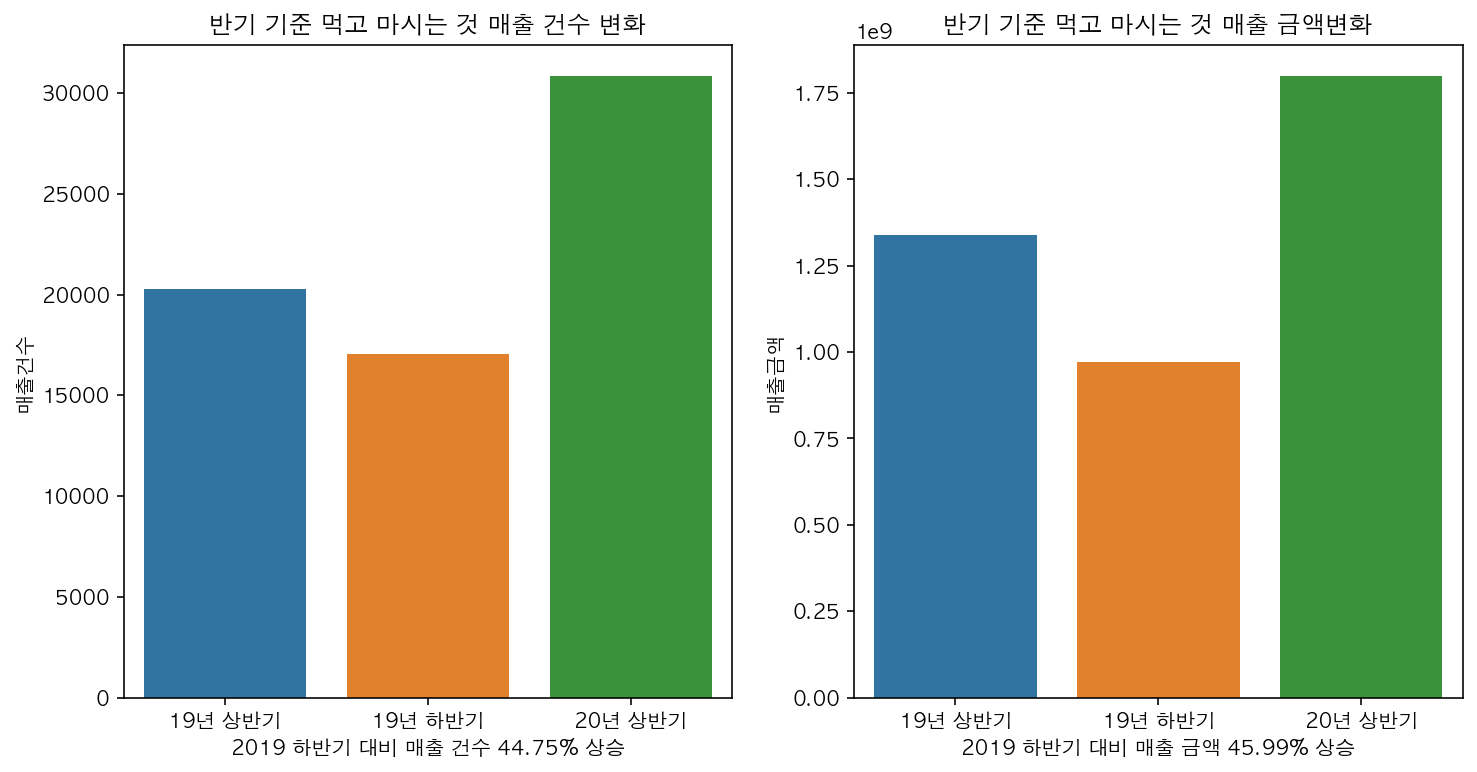

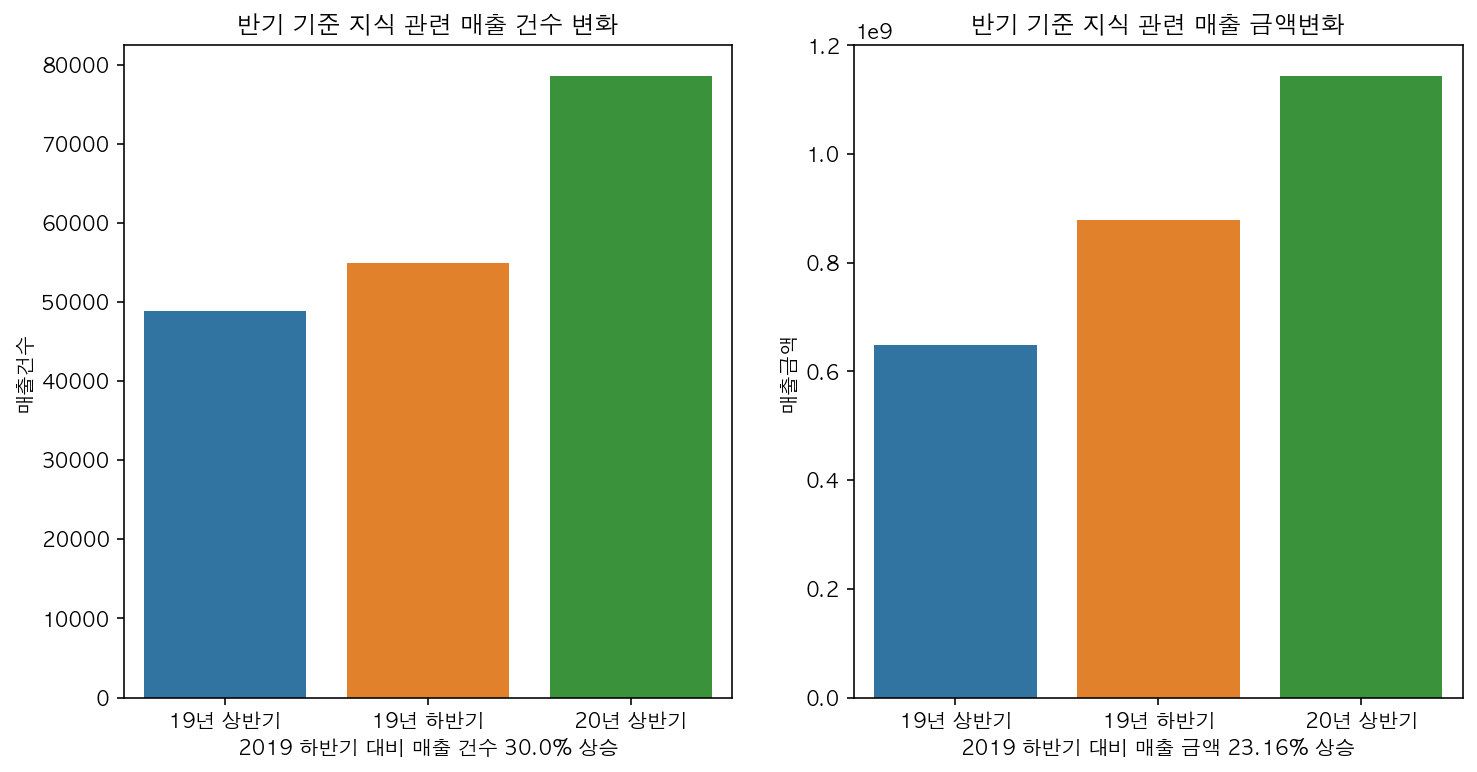

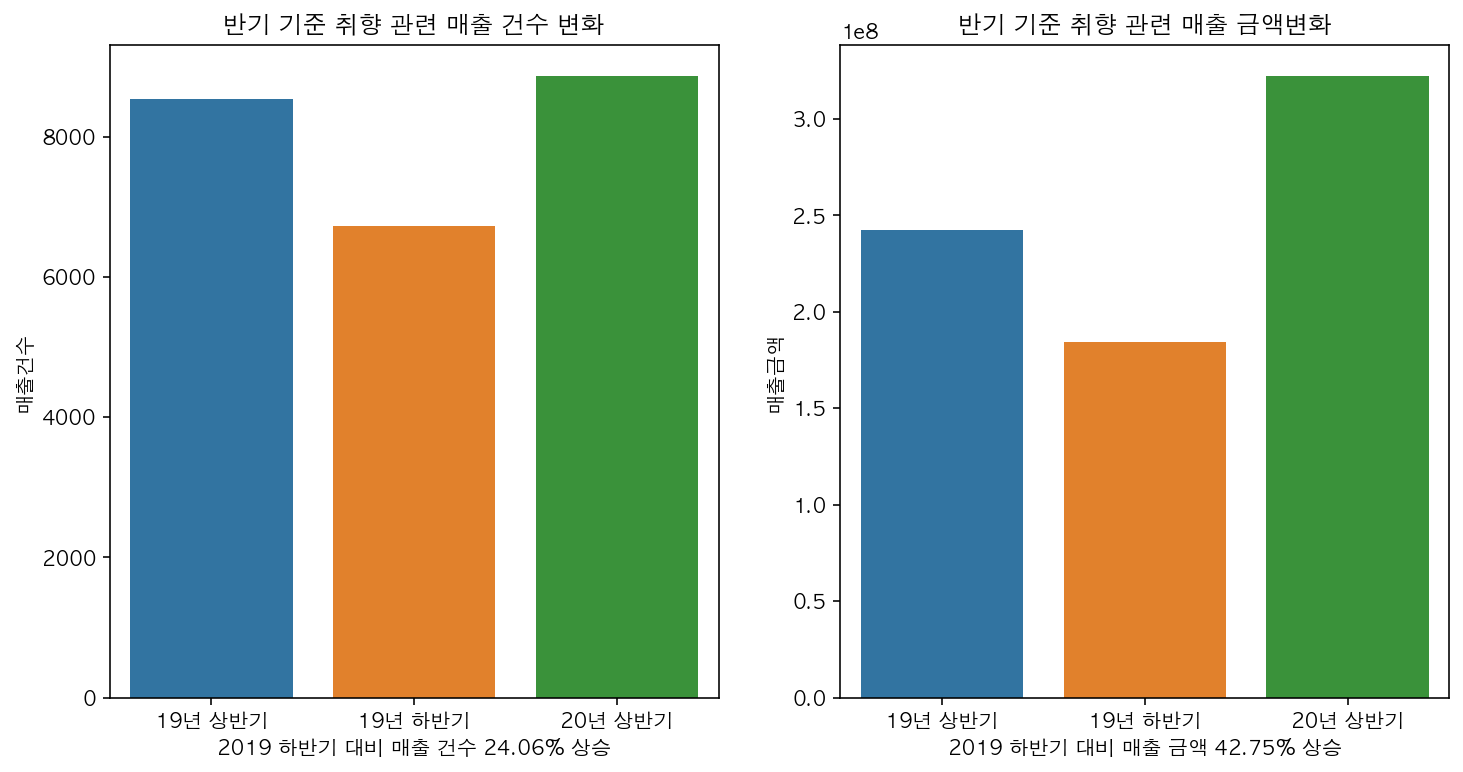

In [67]:
category_ls = list(subscribe_df.대분류.unique())

for category in category_ls:
    category_graph(category=category)

- 확실히 다른 업종보다 먹거리 업종에서의 상승률이 높게 나타남을 알 수 있음

## 배달 추이

In [69]:
delivery_df = pd.read_excel("2. 온라인 세부업종 및 연령대별 이용금액 추이 (KB국민카드).xlsx")

In [70]:
delivery_df

,세부 업종,연령대,19년 대비
0,배달,20대 이하,1.627758
1,배달,30대,1.767111
2,배달,40대,2.136024
3,배달,50대,1.840834
4,배달,60대 이상,1.832880
5,영상/디지털 콘텐츠,20대 이하,1.467330
6,영상/디지털 콘텐츠,30대,1.695312
7,영상/디지털 콘텐츠,40대,1.812470
8,영상/디지털 콘텐츠,50대,1.759634
9,영상/디지털 콘텐츠,60대 이상,2.109614


- 배달, 영상/디지털 콘텐츠, 게임 등 언택트 온라인 산업이 많이 성장했음을 파악할 수 있음
- +) 60대 이상이 모든 종목에서 많이 상승한 이유는 도대체 무엇일까..?

In [72]:
delivery_df.groupby(by="세부 업종").mean().sort_values(by="19년 대비", ascending=False)

,19년 대비
세부 업종,
배달,1.840921
영상/디지털 콘텐츠,1.768872
교통,1.484940
게임,1.478196
쇼핑몰,1.193581


- 평균값으로 보더라도 배달이 1위인 것을 볼 수 있다
- 이를 통해, 언택트 문화 중에서도 특히 배달에 관련된 산업이 급속히 성장함을 알 수 있다
- 따라서 포스트 코로나 시대에 배달 산업의 급속한 성장으로 인한 문제점 또는 서비스 아이디어를 생각해볼 가치는 충분하다고 생각합

## 식생활에서의 배달

In [74]:
eat_df = pd.read_excel("3. 식생활 업종별 이용금액 비중 변화 (KB국민카드).xlsx")

In [76]:
eat_df

,기준년도,식생활 종류 구분,T01 (1.01~1.14),T02 (1.15~1.28),T03 (1.29~2.11),T04 (2.12~2.25),T05 (2.26~3.10),T06 (3.11~3.24),T07 (3.25~4.07),T08 (4.08~4.21),T09 (4.22~5.05),T10 (5.06~5.19),T11 (5.20~6.02),T12 (6.03~6.16)
0,2019년,1.음식점,0.810275,0.791229,0.737331,0.823689,0.817076,0.813853,0.807486,0.806902,0.803851,0.806951,0.802852,0.797884
1,2019년,2.집밥,0.149116,0.167355,0.222242,0.131011,0.138879,0.139755,0.147449,0.146239,0.149305,0.143743,0.148015,0.149345
2,2019년,3.배달앱,0.040608,0.041416,0.040426,0.045300,0.044045,0.046391,0.045065,0.046860,0.046844,0.049307,0.049132,0.052772
3,2020년,1.음식점,0.773691,0.694152,0.761223,0.739738,0.671254,0.696399,0.701063,0.715392,0.734528,0.738276,0.735485,0.738270
4,2020년,2.집밥,0.159517,0.241924,0.157518,0.174336,0.217453,0.201493,0.200461,0.192363,0.184402,0.185761,0.194434,0.178335
5,2020년,3.배달앱,0.066793,0.063924,0.081259,0.085926,0.111293,0.102108,0.098476,0.092246,0.081071,0.075963,0.070081,0.083395


In [130]:
# change_df = pd.DataFrame()

for i in range(2,len(eat_df.columns)):
    ls = list(eat_df.iloc[:,i])
    index = list(eat_df.columns)[i]
    change_df.loc[index,"음식점 변화"] = round((ls[3] - ls[0])*100,2)
    change_df.loc[index,"집밥 변화"] = round((ls[4] - ls[1])*100,2)
    change_df.loc[index,"배달앱 변화"] = round((ls[5] - ls[2])*100,2)

change_df

,음식점 변화,집밥 변화,배달앱 변화
T01 (1.01~1.14),-3.66,1.04,2.62
T02 (1.15~1.28),-9.71,7.46,2.25
T03 (1.29~2.11),2.39,-6.47,4.08
T04 (2.12~2.25),-8.40,4.33,4.06
T05 (2.26~3.10),-14.58,7.86,6.72
T06 (3.11~3.24),-11.75,6.17,5.57
T07 (3.25~4.07),-10.64,5.30,5.34
T08 (4.08~4.21),-9.15,4.61,4.54
T09 (4.22~5.05),-6.93,3.51,3.42
T10 (5.06~5.19),-6.87,4.20,2.67


19년 동기 대비 20년의 퍼센테이지 차이를 보여준다

(단위 : 퍼센테이지 포인트)

-------------------
코로나가 본격적으로 시작하기 전인 1.29-2.11 의 한 기간을 제외하고 모든 기간에서 집밥은 증가+ 하였음

배달앱 역시 모든 기간에 걸쳐 19년도보다 높은 점유율을 보여줌


음식점의 경우 1.29-2.11에만 증가하는 양상을 보이는데, 이는 2019년도 1.29-2.11이 설날 연휴를 끼고 있기 때문으로 파악됨
    - 2020년의 경우 1.15-1.28에 설날이 있음
    
------------------

    
음식점의 감소 추세는 코로나에 익숙해지면서 완화되는 양상을 보이고, 집밥과 배달앱의 경우 증가량이 줄어들었다